In [1]:
# Load & Verify Dataset

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# YOLOv8 class names (based on data.yaml)
class_names = ["large_debris", "medium_debris", "rocket", "satellite", "small_debris"]

# Set dataset paths
train_images_dir = "../dataset/train/images"
train_labels_dir = "../dataset/train/labels"
valid_images_dir = "../dataset/valid/images"
valid_labels_dir = "../dataset/valid/labels"
test_images_dir = "../dataset/test/images"
test_labels_dir = "../dataset/test/labels"

print("✅ Libraries Loaded Successfully!")


✅ Libraries Loaded Successfully!


In [3]:
# Count the Number of Images in Each Split

In [4]:
# Function to count files in a directory
def count_files(directory):
    return len([file for file in os.listdir(directory) if file.endswith(".jpg") or file.endswith(".png")])

# Count images in train, valid, test sets
train_count = count_files(train_images_dir)
valid_count = count_files(valid_images_dir)
test_count = count_files(test_images_dir)

print(f"🟢 Train Images: {train_count}")
print(f"🔵 Validation Images: {valid_count}")
print(f"🟠 Test Images: {test_count}")


🟢 Train Images: 897
🔵 Validation Images: 84
🟠 Test Images: 43


In [5]:
# Check Class Distribution

           Class  Count
0   small_debris    762
1  medium_debris    441
2   large_debris    309
3      satellite    732
4         rocket     27


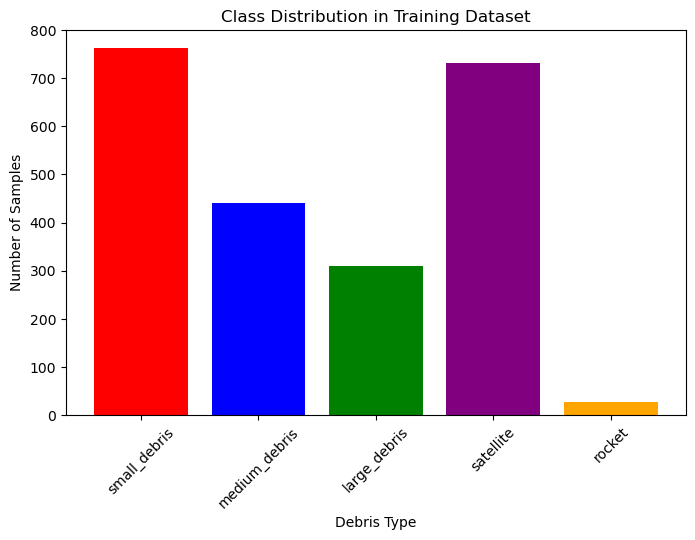

In [6]:
# Count occurrences of each class in train labels
class_counts = Counter()

for label_file in os.listdir(train_labels_dir):
    with open(os.path.join(train_labels_dir, label_file), "r") as f:
        for line in f.readlines():
            class_id = int(line.split()[0])  # Extract class_id
            class_counts[class_id] += 1

# Convert counts to DataFrame for better visualization
df = pd.DataFrame({"Class": [class_names[i] for i in class_counts.keys()], "Count": class_counts.values()})
print(df)

# Plot Class Distribution
plt.figure(figsize=(8, 5))
plt.bar(df["Class"], df["Count"], color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel("Debris Type")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Dataset")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Visualize Images with Annotations

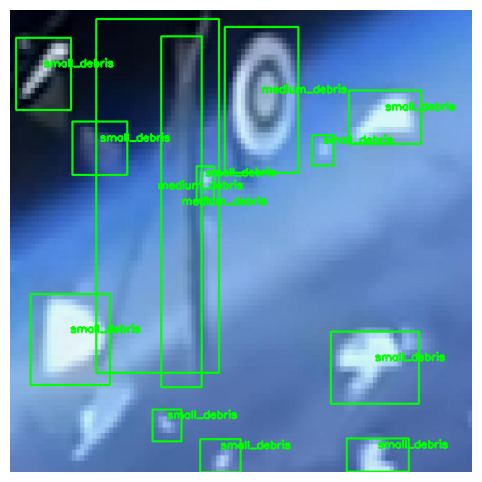

In [8]:
def plot_image_with_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape

    with open(label_path, "r") as f:
        for line in f.readlines():
            data = line.strip().split()
            class_id, x, y, w, h = map(float, data)
            x, y, w, h = int(x * width), int(y * height), int(w * width), int(h * height)

            # Draw bounding box
            cv2.rectangle(img, (x - w//2, y - h//2), (x + w//2, y + h//2), (0, 255, 0), 2)
            cv2.putText(img, class_names[int(class_id)], (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display Image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example Usage
sample_image = os.listdir(train_images_dir)[0]  # Pick a random image
plot_image_with_boxes(os.path.join(train_images_dir, sample_image),
                      os.path.join(train_labels_dir, sample_image.replace(".jpg", ".txt").replace(".png", ".txt")))


In [9]:
# Data Preprocessing
!pip install albumentations opencv-python matplotlib numpy





In [10]:
!pip install --upgrade jupyterlab notebook ipykernel

✅ Dataset paths defined successfully!


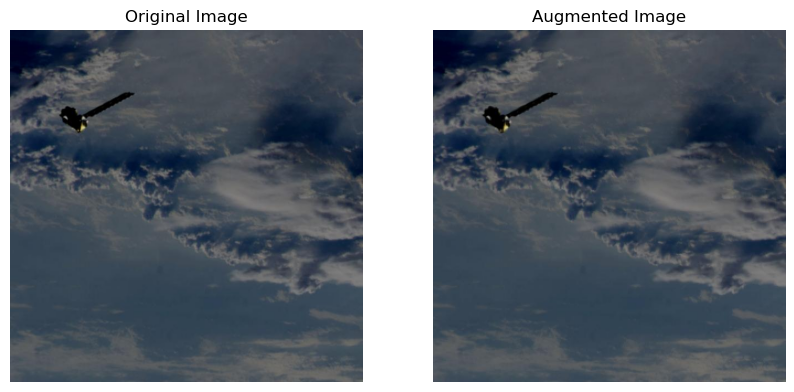

In [11]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ✅ Define dataset paths
train_images_dir = "../dataset/train/images"
train_labels_dir = "../dataset/train/labels"
valid_images_dir = "../dataset/valid/images"
valid_labels_dir = "../dataset/valid/labels"
test_images_dir = "../dataset/test/images"
test_labels_dir = "../dataset/test/labels"

print("✅ Dataset paths defined successfully!")

# ✅ Define class names
class_names = ["large_debris", "medium_debris", "rocket", "satellite", "small_debris"]

# ✅ Augmentation Pipeline
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=10, p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    ToTensorV2()
])

def apply_augmentation(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize image to reduce memory usage
    image = cv2.resize(image, (320, 320))  # Reduce image size before augmentation
    
    augmented = augmentation_pipeline(image=image)
    return augmented['image'].numpy().transpose(1, 2, 0)
 # Convert to correct format for visualization

# ✅ Pick a random image and apply augmentation
sample_image = random.choice(os.listdir(train_images_dir))
augmented_image = apply_augmentation(os.path.join(train_images_dir, sample_image))

# ✅ Display Original vs Augmented Image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
original_image = cv2.imread(os.path.join(train_images_dir, sample_image))
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Augmented Image
ax[1].imshow(augmented_image)
ax[1].set_title("Augmented Image")
ax[1].axis("off")

plt.show()


In [ ]:
# Apply Augmentation to Entire Dataset

In [12]:
import shutil

# Create directories for augmented dataset
augmented_train_images_dir = "../dataset/train_augmented/images"
augmented_train_labels_dir = "../dataset/train_augmented/labels"
augmented_valid_images_dir = "../dataset/valid_augmented/images"
augmented_valid_labels_dir = "../dataset/valid_augmented/labels"

# Ensure directories exist
os.makedirs(augmented_train_images_dir, exist_ok=True)
os.makedirs(augmented_train_labels_dir, exist_ok=True)
os.makedirs(augmented_valid_images_dir, exist_ok=True)
os.makedirs(augmented_valid_labels_dir, exist_ok=True)

# Function to apply augmentation and save image
def augment_and_save(image_path, label_path, save_image_path, save_label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    augmented = augmentation_pipeline(image=image)
    augmented_image = augmented['image'].numpy().transpose(1, 2, 0)  # Convert format

    # Save augmented image
    augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(save_image_path, augmented_image_bgr)

    # Copy corresponding label file
    shutil.copy(label_path, save_label_path)

# Process Training Dataset
for image_file in os.listdir(train_images_dir):
    image_path = os.path.join(train_images_dir, image_file)
    label_path = os.path.join(train_labels_dir, image_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    save_image_path = os.path.join(augmented_train_images_dir, f"aug_{image_file}")
    save_label_path = os.path.join(augmented_train_labels_dir, f"aug_{image_file.replace('.jpg', '.txt').replace('.png', '.txt')}")

    augment_and_save(image_path, label_path, save_image_path, save_label_path)

# Process Validation Dataset
for image_file in os.listdir(valid_images_dir):
    image_path = os.path.join(valid_images_dir, image_file)
    label_path = os.path.join(valid_labels_dir, image_file.replace(".jpg", ".txt").replace(".png", ".txt"))

    save_image_path = os.path.join(augmented_valid_images_dir, f"aug_{image_file}")
    save_label_path = os.path.join(augmented_valid_labels_dir, f"aug_{image_file.replace('.jpg', '.txt').replace('.png', '.txt')}")

    augment_and_save(image_path, label_path, save_image_path, save_label_path)

print("✅ Dataset Augmentation Completed! New images saved.")


✅ Dataset Augmentation Completed! New images saved.
